In [1]:
import os
import time
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.io import imread, imsave

In [2]:
path_ext = '/media/guillermo/Expansion/Thesis GY/3. Analyzed files'
folder_results = 'results'

scopes = {'Tweez scope': 'TiTweez', 'Ti scope': 'Ti'}
dnas = {'pLPT20&pLPT41': 'pLPT20&41', 'pLPT119&pLPT41': 'pLPT119&41', 'pAAA': 'pAAA', 'pLPT107&pLPT41': 'pLPT107&41'}
plasmid_names = {'pLPT20&pLPT41': 'Repressilator single reporter', 
                 'pLPT119&pLPT41': 'Repressilator single reporter no deg tag', 
                 'pAAA': 'Triple constitutive reporter', 
                 'pLPT107&pLPT41': 'Repressilator triple reporter'}

exp_sum = pd.read_excel('../Exps_summary.xlsx')
exp_sum['formatted_dates'] = exp_sum['Date'].dt.strftime('%Y_%m_%d')
#positions = pd.read_excel('../Positions.xlsx')
df = pd.read_excel('../data_processed.xlsx')
exp_sum

,Date,Machine,Strain,DNA,Chemical,Dilution,formatted_dates
0,2023-11-15,Ti scope,MC4100 & DHL708,pLPT20&pLPT41,-,10^(-5),2023_11_15
1,2023-11-15,Tweez scope,MC4100 & DHL708,pLPT20&pLPT41,-,10^(-6),2023_11_15
2,2023-11-17,Ti scope,DHL708,pLPT119&pLPT41,-,10^(-5),2023_11_17
3,2023-11-17,Tweez scope,MC4100 & DHL708,pLPT119&pLPT41,-,10^(-6),2023_11_17
4,2023-11-28,Ti scope,MC4100 & MG1655,pAAA,-,10^(-6),2023_11_28
5,2023-11-28,Tweez scope,MG1655,pAAA,-,10^(-5),2023_11_28
6,2023-11-30,Ti scope,MC4100,pAAA,-,10^(-6),2023_11_30
7,2023-11-30,Tweez scope,MC4100,pAAA,-,10^(-5),2023_11_30
8,2023-12-04,Ti scope,MC4100,pLPT107&pLPT41,IPTG,10^(-6),2023_12_04
9,2023-12-04,Tweez scope,MC4100,pLPT107&pLPT41,IPTG,10^(-5),2023_12_04


In [12]:
# selected experiments
# comparing the effects of IPTG and aTc
# 2023-11-28    Tweez scope         pAAA
# 2023-12-04	Tweez scope	MC4100	pLPT107&pLPT41	IPTG
# 2023-12-06	Tweez scope	MC4100	pLPT20&pLPT41	IPTG
# 2023-12-08	Ti scope	MC4100	pLPT107&pLPT41	aTc
# 2023-12-08	Tweez scope	MC4100	pLPT20&pLPT41	aTc

#### Mean fluo bar plots

No chemical pos 0
im read
edt read


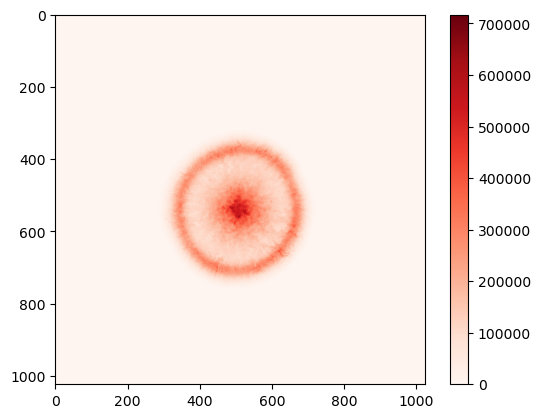

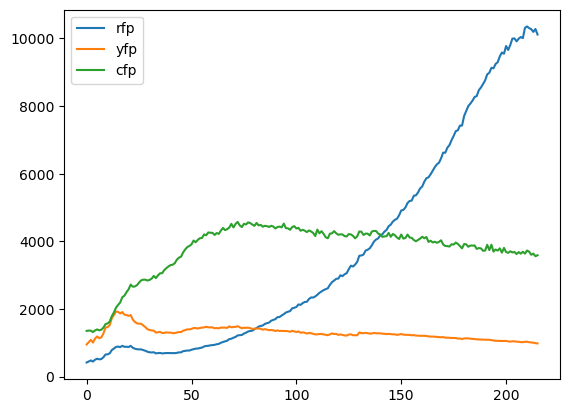

plot done
No chemical pos 1
im read
edt read


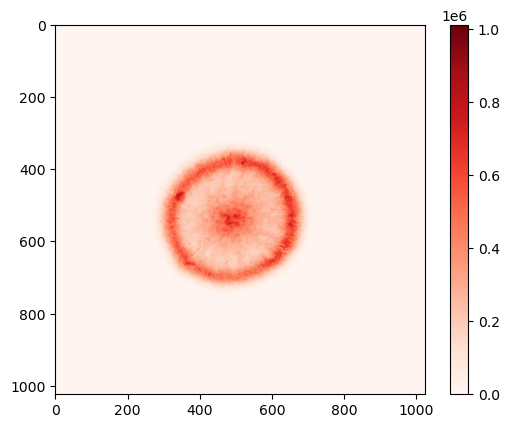

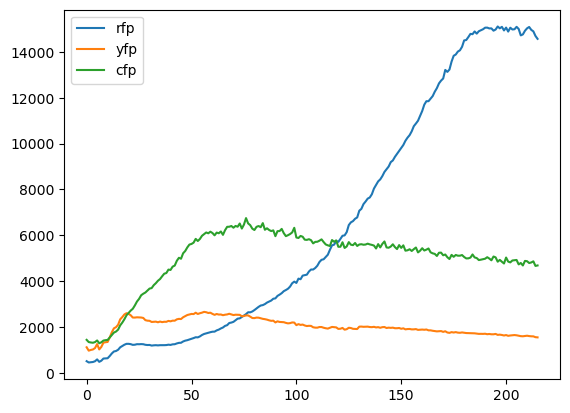

plot done
No chemical pos 3
im read
edt read


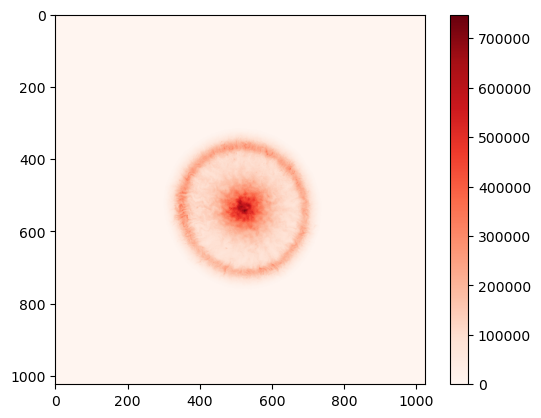

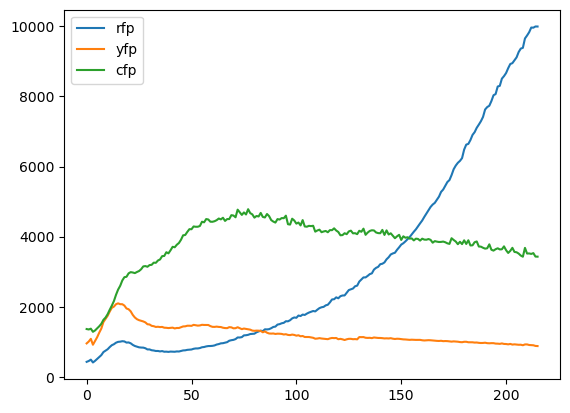

plot done
No chemical pos 4
im read
edt read


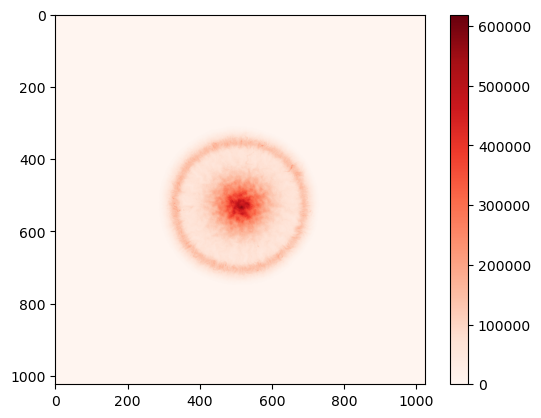

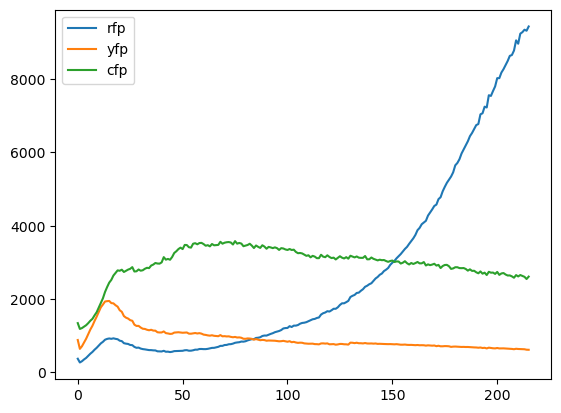

plot done
No chemical pos 5
im read
edt read


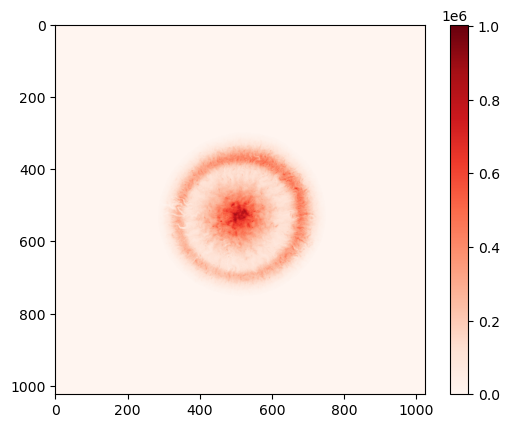

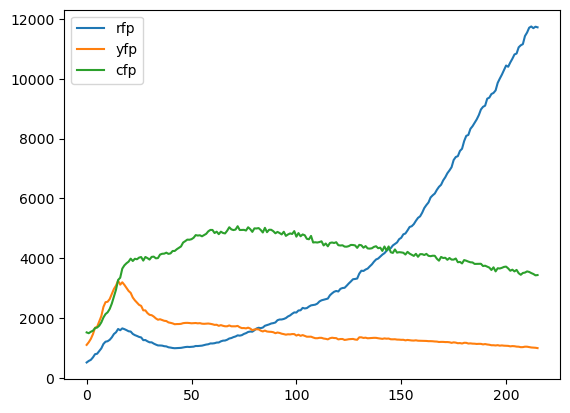

plot done
No chemical pos 6
im read
edt read


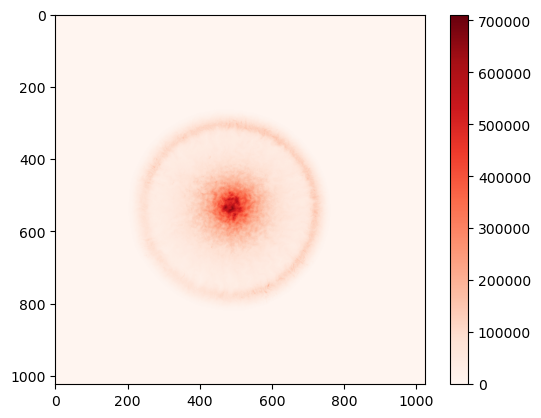

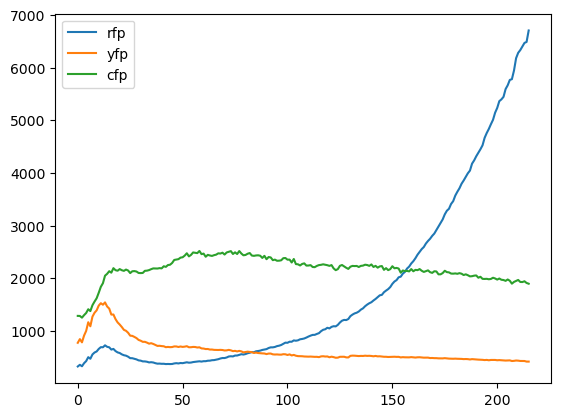

plot done
No chemical pos 7
im read
edt read


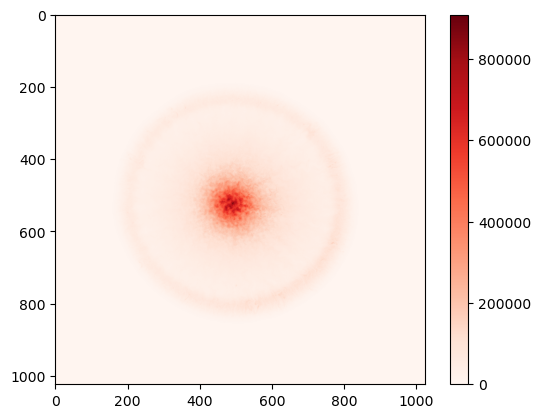

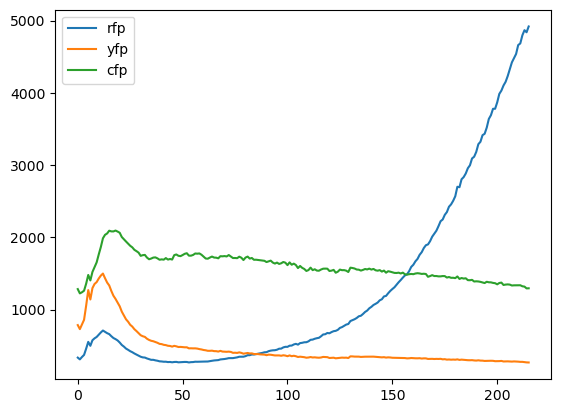

plot done
No chemical pos 8
im read
edt read


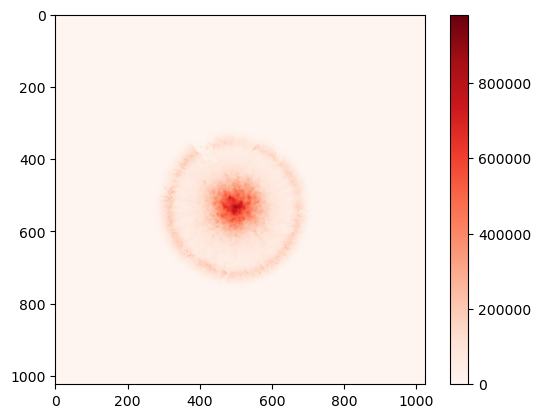

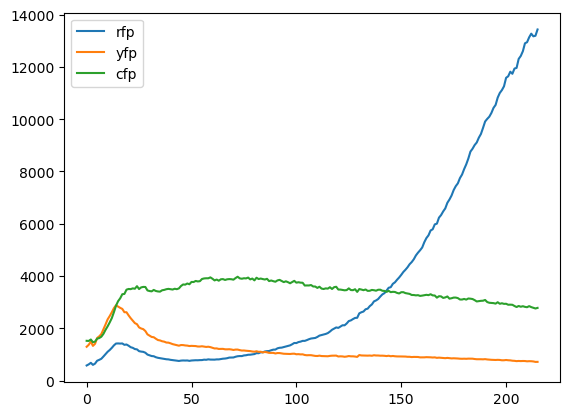

plot done
No chemical pos 9
im read
edt read


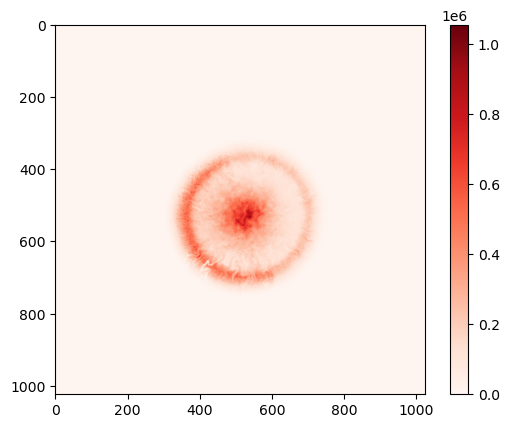

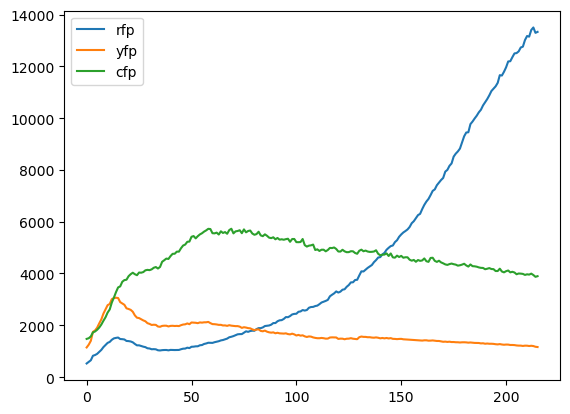

plot done
No chemical pos 10
im read
edt read


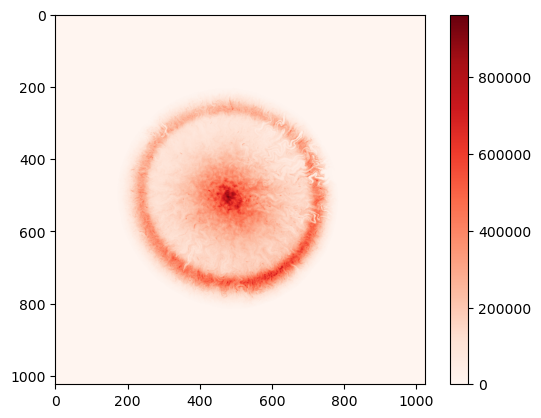

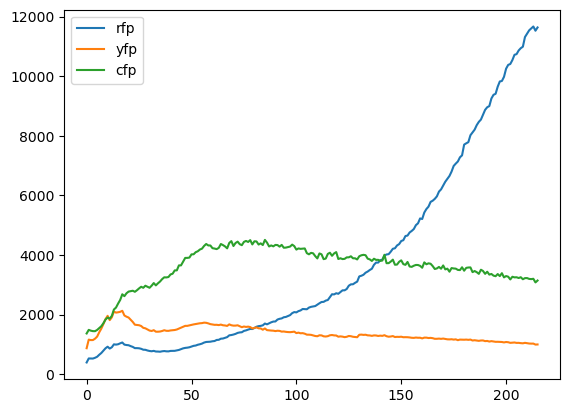

plot done
No chemical pos 11
im read
edt read


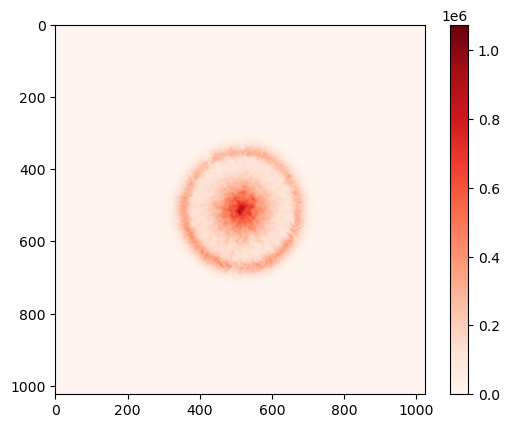

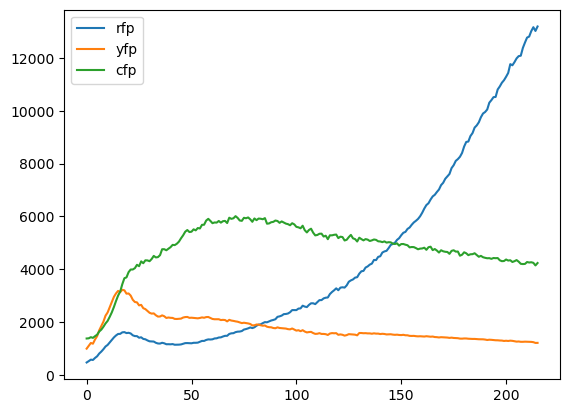

plot done


In [52]:
for i in [5]:#[5, 9,10,11,12]    
    exp_date = exp_sum.loc[i,'formatted_dates']
    vector = exp_sum.loc[i,'DNA']
    scope_name = exp_sum.loc[i,'Machine']
    chem = exp_sum.loc[i,'Chemical']
    
    
    path_scope = os.path.join(path_ext, scope_name)
    path = os.path.join(path_scope, exp_date)

    # for pLPT20 and pLPT107
    """
    df_pos_nochem = df[(df.Date == exp_sum.loc[i, 'Date']) & 
                (df.DNA == vector) & 
                (df.Machine == scope_name) &
                (df.Chemical == chem+'-')]
    df_pos_chem = df[(df.Date == exp_sum.loc[i, 'Date']) & 
                (df.DNA == vector) & 
                (df.Machine == scope_name) &
                (df.Chemical == chem+'+')]
    """
    #"""
    ### for pAAA
    df_pos_nochem = df[(df.Date == exp_sum.loc[i, 'Date']) & 
                (df.DNA == vector) & 
                (df.Machine == scope_name)]
    #"""
    if vector == 'pLPT20&pLPT41' or vector == 'pLPT119&pLPT41':
        yfp_chn = 0
        cfp_chn = 1
        ph_chn = 2
        fluo_chns = 2
    else:
        rfp_chn = 0
        yfp_chn = 1
        cfp_chn = 2
        ph_chn = 3
        fluo_chns = 3
    nt = 216
    mean_fluo_nc = np.zeros((len(df_pos_nochem), nt,fluo_chns))
    #mean_fluo_c = np.zeros((len(df_pos_chem), nt,fluo_chns))



    
    # all positions without chemical
    for j, pos in enumerate(df_pos_nochem.Position.unique()):
        print(f"No chemical pos {pos}")
        path_results = os.path.join(path,folder_results, f"pos{pos}")
        fname = f'{exp_date}_10x_1.0x_{dnas[vector]}_{scopes[scope_name]}_Pos{pos}.ome.tif'
        
        im_all = imread(os.path.join(path,fname)).astype(float)
        im_all = im_all[:nt,:,:,:]
        print("im read")
        nt,nx,ny,nc = im_all.shape
        
        bg = np.zeros((fluo_chns,))
        for c in range(fluo_chns):
            bg[c] = im_all[0,:100,:100,c].mean()
        """
        im = np.zeros_like(im_all)
        for c in range(fluo_chns):
            im[:,:,:,c] = im_all[:,:,:,c] - bg[c]
        im[:,:,:,ph_chn] = im_all[:,:,:,ph_chn]
        print("bg substracted")
        """
        edt = np.load(os.path.join(path_results,'edt.npy'))
        edt = edt[:nt,:,:]
        print("edt read")

        if fluo_chns == 3:
            # just for visualization
            plt.imshow(im_all[100,:,:,0]*edt[100,:,:],cmap='Reds')
            plt.colorbar()
            plt.show()
            
            for t in np.arange(nt):
                for c in np.arange(fluo_chns):
                    mean_fluo_nc[j,t,c] = (im_all[t,edt[t,:,:]>0,c] - bg[c]).mean()
            plt.plot(mean_fluo_nc[j,:,0],label='rfp')
            plt.plot(mean_fluo_nc[j,:,1],label='yfp')
            plt.plot(mean_fluo_nc[j,:,2],label='cfp')
            plt.legend()
            plt.show()
        elif fluo_chns == 2:
            # just for visualization
            plt.imshow(im_all[100,:,:,0]*edt[100,:,:],cmap='Greens')
            plt.colorbar()
            plt.show()
            
            for t in np.arange(nt):
                for c in np.arange(fluo_chns):
                    mean_fluo_nc[j,t,c] = im[t,edt[t,:,:]>0,c].mean()
            plt.plot(mean_fluo_nc[j,:,0],label='yfp')
            plt.plot(mean_fluo_nc[j,:,1],label='cfp')
            #plt.plot(mean_fluo_nc[j,:,2],label='cfp')
            plt.legend()
            plt.show()
        print("plot done")
        del im_all
        #del im
        del edt
    """    
    # all positions with chemical
    for j, pos in enumerate(df_pos_chem.Position.unique()):
        print(f"Chemical pos {pos}")
        path_results = os.path.join(path,folder_results, f"pos{pos}")
        fname = f'{exp_date}_10x_1.0x_{dnas[vector]}_{scopes[scope_name]}_Pos{pos}.ome.tif'
        
        im_all = imread(os.path.join(path,fname)).astype(float)
        im_all = im_all[:nt,:,:,:]
        nt,nx,ny,nc = im_all.shape
        
        bg = np.zeros((fluo_chns,))
        for c in range(fluo_chns):
            bg[c] = im_all[0,:100,:100,c].mean()

        
        #im = np.zeros_like(im_all)
        #for c in range(fluo_chns):
        #    im[:,:,:,c] = im_all[:,:,:,c] - bg[c]
        #im[:,:,:,ph_chn] = im_all[:,:,:,ph_chn]
        
        edt = np.load(os.path.join(path_results,'edt.npy'))
        edt = edt[:nt,:,:]

        if fluo_chns == 3:
            # just for visualization
            plt.imshow(im_all[100,:,:,0]*edt[100,:,:],cmap='Reds')
            plt.colorbar()
            plt.show()
            
            for t in np.arange(nt):
                for c in np.arange(fluo_chns):
                    mean_fluo_c[j,t,c] = (im_all[t,edt[t,:,:]>0,c] - bg[c]).mean()
            plt.plot(mean_fluo_c[j,:,0],label='rfp')
            plt.plot(mean_fluo_c[j,:,1],label='yfp')
            plt.plot(mean_fluo_c[j,:,2],label='cfp')
            plt.legend()
            plt.show()
        elif fluo_chns == 2:
            # just for visualization
            plt.imshow(im_all[100,:,:,0]*edt[100,:,:],cmap='Greens')
            plt.colorbar()
            plt.show()
            
            for t in np.arange(nt):
                for c in np.arange(fluo_chns):
                    mean_fluo_c[j,t,c] = im[t,edt[t,:,:]>0,c].mean()
            plt.plot(mean_fluo_c[j,:,0],label='yfp')
            plt.plot(mean_fluo_c[j,:,1],label='cfp')
            #plt.plot(mean_fluo_c[j,:,2],label='cfp')
            plt.legend()
            plt.show()
        del im_all
        #del im
        del edt

        """

In [53]:
np.save(f'mean_fluo_nc_{exp_date}_{scope_name}.npy', mean_fluo_nc)
np.save(f'mean_fluo_c_{exp_date}_{scope_name}.npy', mean_fluo_c)

##### From file

In [ ]:
# selected experiments
# comparing the effects of IPTG and aTc
# 2023-11-28    Tweez scope         pAAA   ## example of pos 11
# 2023-12-06	Tweez scope	MC4100	pLPT20&pLPT41	IPTG ## example of pos 4
# 2023-12-08	Tweez scope	MC4100	pLPT20&pLPT41	aTc ## example of pos 35
# 2023-12-04	Tweez scope	MC4100	pLPT107&pLPT41	IPTG ## example of pos 7
# 2023-12-08	Ti scope	MC4100	pLPT107&pLPT41	aTc ## example of pos 14

In [122]:
## From file
#"""
exp_date = '2023_11_28'
scope_name = 'Tweez scope'
vector = 'pAAA'
#vector = 'pLPT20&pLPT41'
#vector = 'pLPT107&pLPT41'
chem = ''
#chem = 'IPTG'
#chem = 'ATC'
mean_fluo_nc = np.load(f'mean_fluo_nc_{exp_date}_{scope_name}.npy')
#mean_fluo_c = np.load(f'mean_fluo_c_{exp_date}_{scope_name}.npy')
fluo_chns = 3
pos = 11
folder_results = 'results'
path_scope = os.path.join(path_ext, scope_name)
path = os.path.join(path_scope, exp_date)
path_results = os.path.join(path,folder_results, f"pos{pos}")
#"""

In [123]:
tf = 216
#tf = 406
edt = np.load(os.path.join(path_results,'edt.npy'))[:tf,:,:]

In [124]:
# for plot labels
nt, nx, ny = edt.shape
#nt, nr, nc = wnkymo.shape
#nc = nc + 1
df = pd.read_excel('../data_processed.xlsx')
## preparing labels
df_pos = df[(df['Date'].dt.strftime('%Y_%m_%d') == exp_date) &
    (df.Machine == scope_name) &
    (df.DNA == vector) &
    (df.Position == pos)]

j = df_pos.index[0]
df_pos.loc[:, 't_im'] = pd.to_datetime(df_pos['t_im'], format='%H:%M:%S')
df_pos.loc[:, 't_incub'] = pd.to_datetime(df_pos['t_incub'], format='%H:%M:%S')

time_im = df_pos.loc[j, 't_im']
time_incub = df_pos.loc[j, 't_incub']

delta_im = timedelta(hours=time_im.hour, minutes=time_im.minute, seconds=time_im.second)
delta_incub = timedelta(hours=time_incub.hour, minutes=time_incub.minute, seconds=time_incub.second)

# Calculate the difference
incub_time_s = delta_im - delta_incub
incub_time_n = incub_time_s.total_seconds() / 60

time_points = np.arange(0, df_pos.loc[j, 'exp length'])[:nt] * 10 + incub_time_n
time_strings = [f"{int(tp // 60):02d}" for tp in time_points]  # Ensure two digits for hours

# Select labels at intervals (e.g., every 75 points)
interval = 50
indices = np.arange(0, len(time_points), interval)
selected_time_strings = [time_strings[i] for i in indices]
## distance labels
ylim = edt.max() * df_pos['um_px'].values[0]
edt_max = edt.max(axis=(1,2))

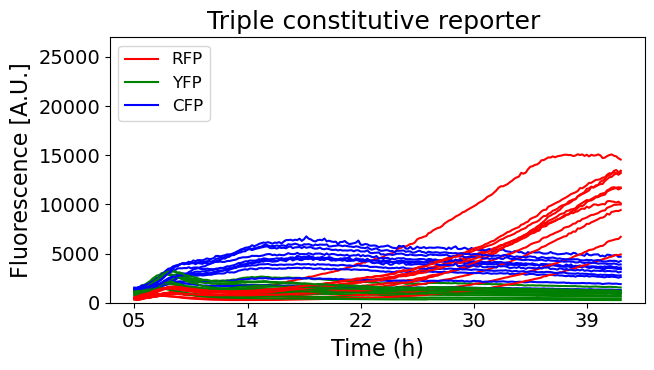

IndexError: index 2 is out of bounds for axis 2 with size 2

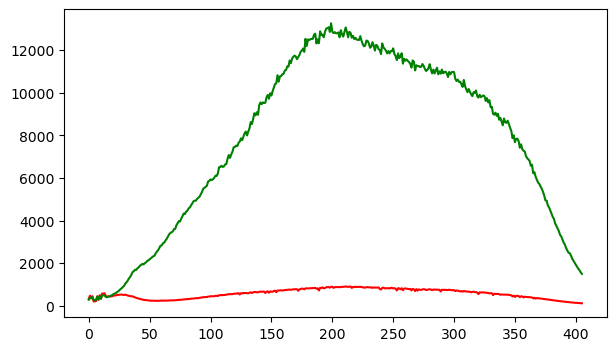

In [125]:
# Create a figure and two subplots
#fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

# Plot the first set of data (IPTG-)
ncolnc, ntnc, ncnc = mean_fluo_nc.shape
if fluo_chns == 3:
    for col in np.arange(ncolnc):
        ax.plot(mean_fluo_nc[col,:,0], 'r-', label='RFP' if col == 0 else "")
        ax.plot(mean_fluo_nc[col,:,1], 'g-', label='YFP' if col == 0 else "")
        ax.plot(mean_fluo_nc[col,:,2], 'b-', label='CFP' if col == 0 else "")
elif fluo_chns == 2:
    for col in np.arange(ncolnc):
        ax.plot(mean_fluo_nc[col,:,0], 'g-', label='YFP' if col == 0 else "")
        ax.plot(mean_fluo_nc[col,:,1], 'b-', label='CFP' if col == 0 else "")
        #ax.plot(mean_fluo_nc[col,:,2], 'b-', label='CFP' if col == 0 else "")
ax.set_ylim([0, 27000])
ax.set_xlabel('Time (h)', fontsize=16)
ax.set_xticks(indices)
ax.set_xticklabels(selected_time_strings,fontsize=14)
ax.set_ylabel('Fluorescence [A.U.]', fontsize=16)
#ax.set_yticks([0, 4000, 8000, 12000, 16000, 20000])
ax.tick_params(axis='y', labelsize=14)
ax.set_title(f'{plasmid_names[vector]} {chem}', fontsize=18)
#ax.set_title(f'{plasmid_names[vector]} {chem}-', fontsize=18)
ax.legend(fontsize=12,loc='upper left')
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.savefig(f'Ch4/meanfluo_timetraces_{exp_date}_{vector}_{chem}-.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(7, 4))

# Plot the second set of data (IPTG+)
ncolc, ntc, ncc = mean_fluo_c.shape

if fluo_chns == 3:
    for col in np.arange(ncolc):
        ax.plot(mean_fluo_c[col,:,0], 'r-', label='RFP' if col == 0 else "")
        ax.plot(mean_fluo_c[col,:,1], 'g-', label='YFP' if col == 0 else "")
        ax.plot(mean_fluo_c[col,:,2], 'b-', label='CFP' if col == 0 else "")
elif fluo_chns == 2:
    for col in np.arange(ncolc):
        ax.plot(mean_fluo_c[col,:,0], 'g-', label='YFP' if col == 0 else "")
        ax.plot(mean_fluo_c[col,:,1], 'b-', label='CFP' if col == 0 else "")
        #ax.plot(mean_fluo_c[col,:,2], 'b-', label='CFP' if col == 0 else "")
ax.set_ylim([0, 27000])
ax.set_xlabel('Time (h)', fontsize=16)

ax.set_ylabel('Fluorescence [A.U.]', fontsize=16)
ax.set_title(f'{plasmid_names[vector]} {chem}+', fontsize=18)
ax.legend(fontsize=12,loc='upper left')
ax.set_xticks(indices)
ax.set_xticklabels(selected_time_strings,fontsize=14)
#ax.set_yticks([0, 9000,18000,27000])
ax.tick_params(axis='y', labelsize=14)
# Adjust layout for better fit
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.savefig(f'Ch4/meanfluo_timetraces_{exp_date}_{vector}_{chem}+.png', dpi=300, bbox_inches='tight')
# Show the combined plot
plt.show()

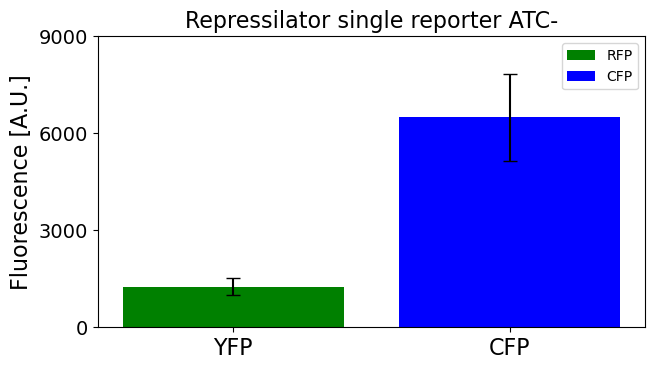

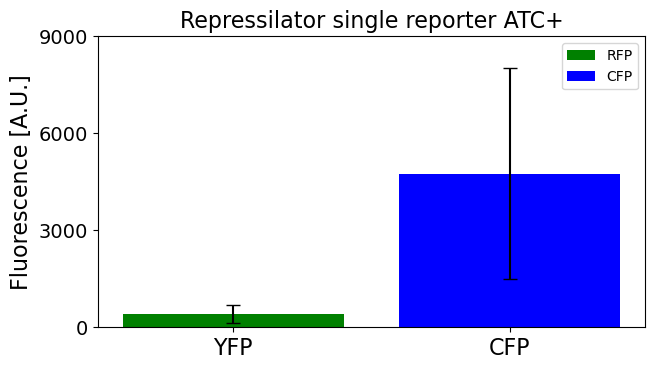

In [109]:
# Calculate the average fluorescence levels for the first dataset (IPTG-)
if fluo_chns == 2:
    ncolnc, ntnc, ncnc = mean_fluo_nc.shape
    av_fluo_nc = np.zeros((ncolnc, ncnc))
    for col in np.arange(ncolnc):
        av_fluo_nc[col, 0] = np.nanmean(mean_fluo_nc[col, :, 0])
        av_fluo_nc[col, 1] = np.nanmean(mean_fluo_nc[col, :, 1])
        #av_fluo_nc[col, 2] = np.nanmean(mean_fluo_nc[col, :, 2])
    
    # Calculate the average fluorescence levels for the second dataset (IPTG+)
    ncolc, ntc, ncc = mean_fluo_c.shape
    av_fluo_c = np.zeros((ncolc, ncc))
    for col in np.arange(ncolnc):  # Note: ncolnc should be ncolc for consistency with the dataset
        av_fluo_c[col, 0] = np.nanmean(mean_fluo_c[col, :, 0])
        av_fluo_c[col, 1] = np.nanmean(mean_fluo_c[col, :, 1])
        #av_fluo_c[col, 2] = np.nanmean(mean_fluo_c[col, :, 2])
    
    # Calculate the maximum y-limit across both datasets
    """
    max_ylim = max(
        av_fluo_nc.max() + av_fluo_nc.std(),
        av_fluo_c.max() + av_fluo_c.std()
    )
    """
    max_ylim = 9000
    
    # Create a figure and two subplots
    fig, ax = plt.subplots(1, 1, figsize=(7, 4))
    
    # Plot the first bar chart in the first subplot
    ax.bar(0, av_fluo_nc[:, 0].mean(), yerr=av_fluo_nc[:, 0].std(), color='Green', label='RFP', capsize=5)
    ax.bar(1, av_fluo_nc[:, 1].mean(), yerr=av_fluo_nc[:, 1].std(), color='Blue', label='CFP', capsize=5)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['YFP', 'CFP'], fontsize=16)
    ax.set_ylabel('Fluorescence [A.U.]', fontsize=16)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_yticks([0, 3000, 6000, 9000])
    ax.set_title(f'{plasmid_names[vector]} {chem}-', fontsize=16)
    ax.legend()
    ax.set_ylim(0, max_ylim)  # Set the same y-limit
    # Adjust layout for better fit
    plt.tight_layout(rect=[0.05, 0.05, 1, 1])
    plt.savefig(f'Ch4/meanfluo_barplot_{exp_date}_{vector}_{chem}-.png', dpi=300, bbox_inches='tight')
    # Show the combined plot
    plt.show()

    fig, ax = plt.subplots(1, 1, figsize=(7, 4))
    # Plot the second bar chart in the second subplot
    ax.bar(0, av_fluo_c[:, 0].mean(), yerr=av_fluo_c[:, 0].std(), color='Green', label='RFP', capsize=5)
    ax.bar(1, av_fluo_c[:, 1].mean(), yerr=av_fluo_c[:, 1].std(), color='Blue', label='CFP', capsize=5)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['YFP', 'CFP'], fontsize=16)
    ax.set_ylabel('Fluorescence [A.U.]', fontsize=16)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_yticks([0, 3000, 6000, 9000])
    ax.set_title(f'{plasmid_names[vector]} {chem}+', fontsize=16)
    ax.legend()
    ax.set_ylim(0, max_ylim)  # Set the same y-limit
    
    # Adjust layout for better fit
    plt.tight_layout(rect=[0.05, 0.05, 1, 1])
    plt.savefig(f'Ch4/meanfluo_barplot_{exp_date}_{vector}_{chem}+.png', dpi=300, bbox_inches='tight')
    # Show the combined plot
    plt.show()

elif fluo_chns == 3:
    ncolnc, ntnc, ncnc = mean_fluo_nc.shape
    av_fluo_nc = np.zeros((ncolnc, ncnc))
    for col in np.arange(ncolnc):
        av_fluo_nc[col, 0] = np.nanmean(mean_fluo_nc[col, :, 0])
        av_fluo_nc[col, 1] = np.nanmean(mean_fluo_nc[col, :, 1])
        av_fluo_nc[col, 2] = np.nanmean(mean_fluo_nc[col, :, 2])
    
    # Calculate the average fluorescence levels for the second dataset (IPTG+)
    ncolc, ntc, ncc = mean_fluo_c.shape
    av_fluo_c = np.zeros((ncolc, ncc))
    for col in np.arange(ncolnc):  # Note: ncolnc should be ncolc for consistency with the dataset
        av_fluo_c[col, 0] = np.nanmean(mean_fluo_c[col, :, 0])
        av_fluo_c[col, 1] = np.nanmean(mean_fluo_c[col, :, 1])
        av_fluo_c[col, 2] = np.nanmean(mean_fluo_c[col, :, 2])
    
    # Calculate the maximum y-limit across both datasets
    """
    max_ylim = max(
        av_fluo_nc.max() + av_fluo_nc.std(),
        av_fluo_c.max() + av_fluo_c.std()
    )
    """
    max_ylim = 6000
    
    # Create a figure and two subplots
    #fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    fig, ax = plt.subplots(1, 1, figsize=(7, 4))
    
    # Plot the first bar chart in the first subplot
    ax.bar(0, av_fluo_nc[:, 0].mean(), yerr=av_fluo_nc[:, 0].std(), color='Red', label='RFP', capsize=5)
    ax.bar(1, av_fluo_nc[:, 1].mean(), yerr=av_fluo_nc[:, 1].std(), color='Green', label='YFP', capsize=5)
    ax.bar(2, av_fluo_nc[:, 2].mean(), yerr=av_fluo_nc[:, 2].std(), color='Blue', label='CFP', capsize=5)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['RFP', 'YFP', 'CFP'], fontsize=16)
    ax.set_ylabel('Fluorescence [A.U.]', fontsize=16)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_title(f'{plasmid_names[vector]} {chem}-', fontsize=18)
    #ax.legend()
    ax.set_ylim(0, max_ylim)  # Set the same y-limit
    # Adjust layout for better fit
    plt.tight_layout(rect=[0.05, 0.05, 1, 1])
    plt.savefig(f'Ch4/meanfluo_barplot_{exp_date}_{vector}_{chem}-.png', dpi=300, bbox_inches='tight')
    
    # Show the combined plot
    plt.show()

    fig, ax = plt.subplots(1, 1, figsize=(7, 4))
    
    # Plot the second bar chart in the second subplot
    ax.bar(0, av_fluo_c[:, 0].mean(), yerr=av_fluo_c[:, 0].std(), color='Red', label='RFP', capsize=5)
    ax.bar(1, av_fluo_c[:, 1].mean(), yerr=av_fluo_c[:, 1].std(), color='Green', label='YFP', capsize=5)
    ax.bar(2, av_fluo_c[:, 2].mean(), yerr=av_fluo_c[:, 2].std(), color='Blue', label='CFP', capsize=5)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['RFP', 'YFP', 'CFP'], fontsize=16)
    ax.set_ylabel('Fluorescence [A.U.]', fontsize=16)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_title(f'{plasmid_names[vector]} {chem}+', fontsize=18)
    #ax.legend()
    ax.set_ylim(0, max_ylim)  # Set the same y-limit
    
    # Adjust layout for better fit
    plt.tight_layout(rect=[0.05, 0.05, 1, 1])
    plt.savefig(f'Ch4/meanfluo_barplot_{exp_date}_{vector}_{chem}+.png', dpi=300, bbox_inches='tight')
    
    # Show the combined plot
    plt.show()


In [10]:
#np.save(f'mean_fluo_nc_{exp_date}_{scope_name}.npy', mean_fluo_nc)
#np.save(f'mean_fluo_c_{exp_date}_{scope_name}.npy', mean_fluo_c)

#### Mean fluo kymos

This kymos were done in the notebook Chapter 4. c - Correlation kymos

In [ ]:
# data files selected:
# OK 2023_11_28 pAAA Tweez Pos 1
# OK 2023_12_06 pLPT20 Tweez Pos 4
# OK 2023_12_06 pLPT20 IPTG Tweez pos 11
# OK 2023_12_08 pLPT20 aTc Tweez pos 35
# OK 2023_12_04 pLPT107 Tweez pos 7
# OK 2023_12_04 pLPT107 IPTG Tweez pos 31
# OK 2023_12_08 pLPT107 aTc Ti Pos 14

In [51]:
path_ext = '/media/guillermo/Expansion/Thesis GY/3. Analyzed files'
folder_results = 'results'
folder_velocity = 'velocity_data'

scopes = {'Tweez scope': 'TiTweez', 'Ti scope': 'Ti'}
dnas = {'pLPT20&pLPT41': 'pLPT20&41', 'pLPT119&pLPT41': 'pLPT119&41', 'pAAA': 'pAAA', 'pLPT107&pLPT41': 'pLPT107&41'}
plasmid_name = {'pLPT20&pLPT41': 'Single reporter', 
                'pLPT119&pLPT41': 'Single reporter no deg tag', 
                'pAAA': 'Triple constitutive reporter', 
                'pLPT107&pLPT41': 'Triple reporter '}

exp_date = '2023_12_08'
#vector = 'pAAA'
#vector = 'pLPT20&pLPT41'
#vector = 'pLPT119&pLPT41'
vector = 'pLPT107&pLPT41'


#chem = ''
#chem = 'IPTG'
chem = 'aTc'
scope_name = 'Ti scope'
pos = 14

path_scope = os.path.join(path_ext, scope_name)
path = os.path.join(path_scope, exp_date)
path_results = os.path.join(path,folder_results, f"pos{pos}")
path_velocity = os.path.join(path,folder_velocity, f"pos{pos}")

fname = f'{exp_date}_10x_1.0x_{dnas[vector]}_{scopes[scope_name]}_Pos{pos}.ome.tif'

if vector == 'pLPT20&pLPT41' or vector == 'pLPT119&pLPT41':
    yfp_chn = 0
    cfp_chn = 1
    ph_chn = 2
    fluo_chns = 2
else:
    rfp_chn = 0
    yfp_chn = 1
    cfp_chn = 2
    ph_chn = 3
    fluo_chns = 3

fname

'2023_12_08_10x_1.0x_pLPT107&41_Ti_Pos14.ome.tif'

##### From file

In [54]:
# from file
tf = 256
corr_map = np.load(os.path.join(path_results, 'corr_map.npy'))[:tf,:,:]
mean_map = np.load(os.path.join(path_results, 'mean_map.npy'))[:tf,:,:]
edt = np.load(os.path.join(path_results,'edt.npy'))[:tf,:,:]

nt,_,_ = corr_map.shape

# for plot labels
df = pd.read_excel('../data_processed.xlsx')
## preparing labels
df_pos = df[(df['Date'].dt.strftime('%Y_%m_%d') == exp_date) &
    (df.Machine == scope_name) &
    (df.DNA == vector) &
    (df.Position == pos)]

j = df_pos.index[0]
df_pos.loc[:, 't_im'] = pd.to_datetime(df_pos['t_im'], format='%H:%M:%S')
df_pos.loc[:, 't_incub'] = pd.to_datetime(df_pos['t_incub'], format='%H:%M:%S')

time_im = df_pos.loc[j, 't_im']
time_incub = df_pos.loc[j, 't_incub']

delta_im = timedelta(hours=time_im.hour, minutes=time_im.minute, seconds=time_im.second)
delta_incub = timedelta(hours=time_incub.hour, minutes=time_incub.minute, seconds=time_incub.second)

# Calculate the difference
incub_time_s = delta_im - delta_incub
incub_time_n = incub_time_s.total_seconds() / 60

time_points = np.arange(0, df_pos.loc[j, 'exp length'])[:nt] * 10 + incub_time_n
time_strings = [f"{int(tp // 60):02d}" for tp in time_points]  # Ensure two digits for hours

# Select labels at intervals (e.g., every 75 points)
interval = 30
indices = np.arange(0, len(time_points), interval)
selected_time_strings = [time_strings[i] for i in indices]

## distance labels
#ylim = int(edt.max() * df_pos['um_px'].values[0])
ylim = edt.max() * df_pos['um_px'].values[0]
edt_max = edt.max(axis=(1,2))
radius = edt_max * df_pos['um_px'].values[0]
yticks = np.linspace(-ylim, ylim, num=7).astype('int')

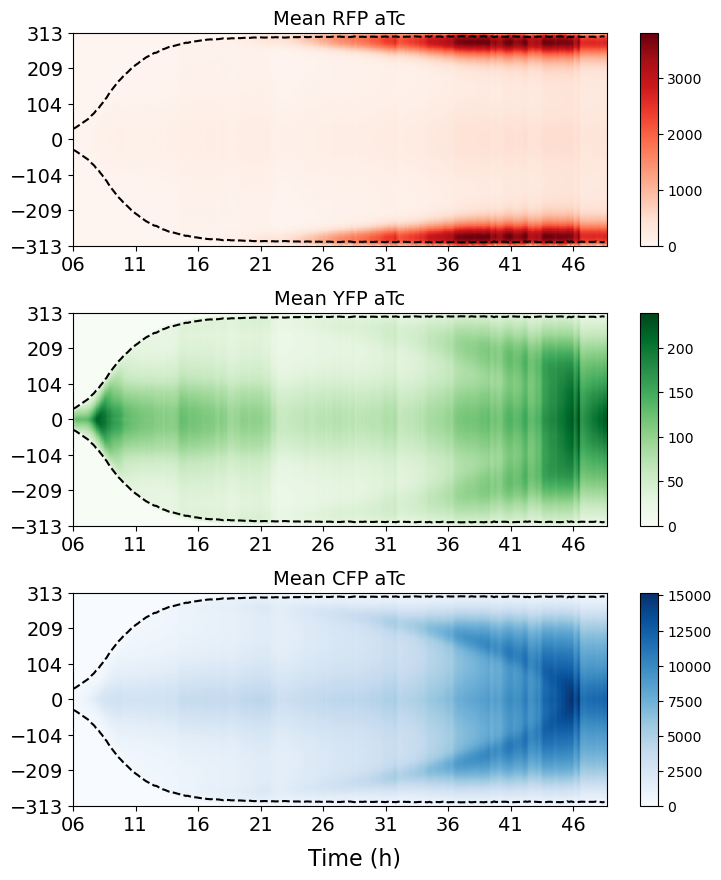

In [55]:
t0 = 0

## distance labels
#ylim = int(edt.max() * df_pos['um_px'].values[0])
edt_max = edt.max(axis=(1,2))
radius = edt_max * df_pos['um_px'].values[0]

if fluo_chns == 3:
    mean_mapr = np.zeros_like(mean_map)
    mean_mapy = np.zeros_like(mean_map)
    mean_mapc = np.zeros_like(mean_map)
    
    mean_mapr[:,:,0] = mean_map[:,:,rfp_chn]
    mean_mapy[:,:,1] = mean_map[:,:,yfp_chn]
    mean_mapc[:,:,2] = mean_map[:,:,cfp_chn]
    
    plt.figure(figsize=(8, 9))
    
    plt.subplot(3,1,1)
    plt.imshow(np.hstack([mean_mapr[t0:,::-1,0], mean_mapr[t0:,:,0]]).transpose([1, 0]), 
               extent=[t0, nt, -ylim, ylim], 
               aspect='auto', cmap='Reds')
    plt.plot(np.arange(nt), radius-10, 'k--')
    plt.plot(np.arange(nt), -radius+10, 'k--')
    #plt.xlabel('Time (h)')
    plt.title(f'Mean RFP {chem}',fontsize=14)
    plt.yticks(ticks=yticks,fontsize=14)
    plt.colorbar(aspect=12)
    plt.xticks(ticks=indices, labels=selected_time_strings,fontsize=14)
    
    plt.subplot(3,1,2)
    plt.imshow(np.hstack([mean_mapy[t0:,::-1,1], mean_mapy[t0:,:,1]]).transpose([1, 0]), 
               extent=[t0, nt, -ylim, ylim], 
               aspect='auto', cmap='Greens')
    plt.plot(np.arange(nt), radius-10, 'k--')
    plt.plot(np.arange(nt), -radius+10, 'k--')
    #plt.xlabel('Time (h)')
    plt.title(f'Mean YFP {chem}',fontsize=14)
    plt.yticks(ticks=yticks,fontsize=14)
    plt.colorbar(aspect=12)
    plt.xticks(ticks=indices, labels=selected_time_strings,fontsize=14)
    
    plt.subplot(3,1,3)
    plt.imshow(np.hstack([mean_mapc[t0:,::-1,2], mean_mapc[t0:,:,2]]).transpose([1, 0]), 
               extent=[t0, nt, -ylim, ylim], 
               aspect='auto', cmap='Blues')
    plt.plot(np.arange(nt), radius-10, 'k--')
    plt.plot(np.arange(nt), -radius+10, 'k--')
    #plt.xlabel('Time (h)')
    plt.title(f'Mean CFP {chem}',fontsize=14)
    plt.yticks(ticks=yticks,fontsize=14)
    plt.colorbar(aspect=12)
    plt.xticks(ticks=indices, labels=selected_time_strings,fontsize=14)

    # Add shared x and y labels
    plt.gcf().text(0.5, 0.04, 'Time (h)', ha='center', va='center', fontsize=16)
    #plt.gcf().text(0.04, 0.5, r'Radial distance $(\mu m)$', ha='center', va='center', rotation='vertical', fontsize=16)
    
    plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Adjust layout to make room for the shared labels
    plt.savefig(f'Ch4/mean_fluo_{vector}_{chem}_pos{pos}.png', dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()
    
elif fluo_chns == 2:
    #mean_mapr = np.zeros_like(mean_map)
    mean_mapy = np.zeros_like(mean_map)
    mean_mapc = np.zeros_like(mean_map)
    
    #mean_mapr[:,:,0] = mean_map[:,:,rfp_chn]
    mean_mapy[:,:,0] = mean_map[:,:,yfp_chn]
    mean_mapc[:,:,1] = mean_map[:,:,cfp_chn]
    
    plt.figure(figsize=(8, 6))
    
    plt.subplot(2,1,1)
    plt.imshow(np.hstack([mean_mapy[t0:,::-1,0], mean_mapy[t0:,:,0]]).transpose([1, 0]), 
               extent=[t0, nt, -ylim, ylim], 
               aspect='auto', cmap='Greens')
    plt.plot(np.arange(nt), radius-10, 'k--')
    plt.plot(np.arange(nt), -radius+10, 'k--')
    #plt.xlabel('Time (h)')
    plt.title(f'Mean YFP {chem}',fontsize=14)
    plt.yticks(ticks=yticks,fontsize=14)
    plt.colorbar(aspect=12)
    plt.xticks(ticks=indices, labels=selected_time_strings,fontsize=14)
    
    plt.subplot(2,1,2)
    plt.imshow(np.hstack([mean_mapc[t0:,::-1,1], mean_mapc[t0:,:,1]]).transpose([1, 0]), 
               extent=[t0, nt, -ylim, ylim], 
               aspect='auto', cmap='Blues')
    plt.plot(np.arange(nt), radius-10, 'k--')
    plt.plot(np.arange(nt), -radius+10, 'k--')
    #plt.xlabel('Time (h)')
    plt.title(f'Mean CFP {chem}',fontsize=14)
    plt.yticks(ticks=yticks,fontsize=14)
    plt.colorbar(aspect=12)
    plt.xticks(ticks=indices, labels=selected_time_strings,fontsize=14)
    
    # Add shared x and y labels
    plt.gcf().text(0.5, 0.04, 'Time (h)', ha='center', va='center', fontsize=16)
    plt.gcf().text(0.04, 0.5, r'Radial distance $(\mu m)$', ha='center', va='center', rotation='vertical', fontsize=16)
    
    plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Adjust layout to make room for the shared labels
    plt.savefig(f'Ch4/mean_fluo_{vector}_{chem}_pos{pos}.png', dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()#